
# Advanced Analysis on Prevalence of Undernourishment Dataset

This notebook performs a comprehensive analysis on the dataset containing information about the prevalence of undernourishment across different regions and years. 

## Dataset Overview

The dataset includes the following columns:
- **Entity**: The region or country.
- **Year**: The year of the data.
- **2.1.1 Prevalence of undernourishment**: The prevalence of undernourishment.
- **percentage**: The percentage of the population that is undernourished.



## Data Loading and Cleaning

In [25]:

import pandas as pd

file_path = 'data/prevalence-of-undernourishment new.csv'
data = pd.read_csv(file_path)

data['percentage'] = pd.to_numeric(data['percentage'].str.replace(',', '.').str.rstrip('%'), errors='coerce')

data = data.dropna(subset=['percentage'])

data.head()


,Entity,Year,2.1.1 Prevalence of undernourishment,percentage
0,Africa (FAO),2000,22.4,45404.0
1,Americas (FAO),2000,6.7,45479.0
2,Asia (FAO),2000,14.0,14.0
3,Caribbean (FAO),2000,17.7,45490.0
4,Central America (FAO),2000,8.1,45299.0



## Basic Statistics 

In [26]:
data.describe()

,Year,2.1.1 Prevalence of undernourishment,percentage
count,4188.000000,4188.000000,4188.000000
mean,2011.112225,9.570415,41952.032951
std,6.139826,8.383903,12063.769158
min,2000.000000,2.500000,0.000000
25%,2006.000000,2.500000,45361.000000
50%,2011.000000,6.100000,45414.000000
75%,2016.000000,14.600000,45452.000000
max,2022.000000,68.000000,45565.000000


## Prevalence of Undernourishment Over Time by Region

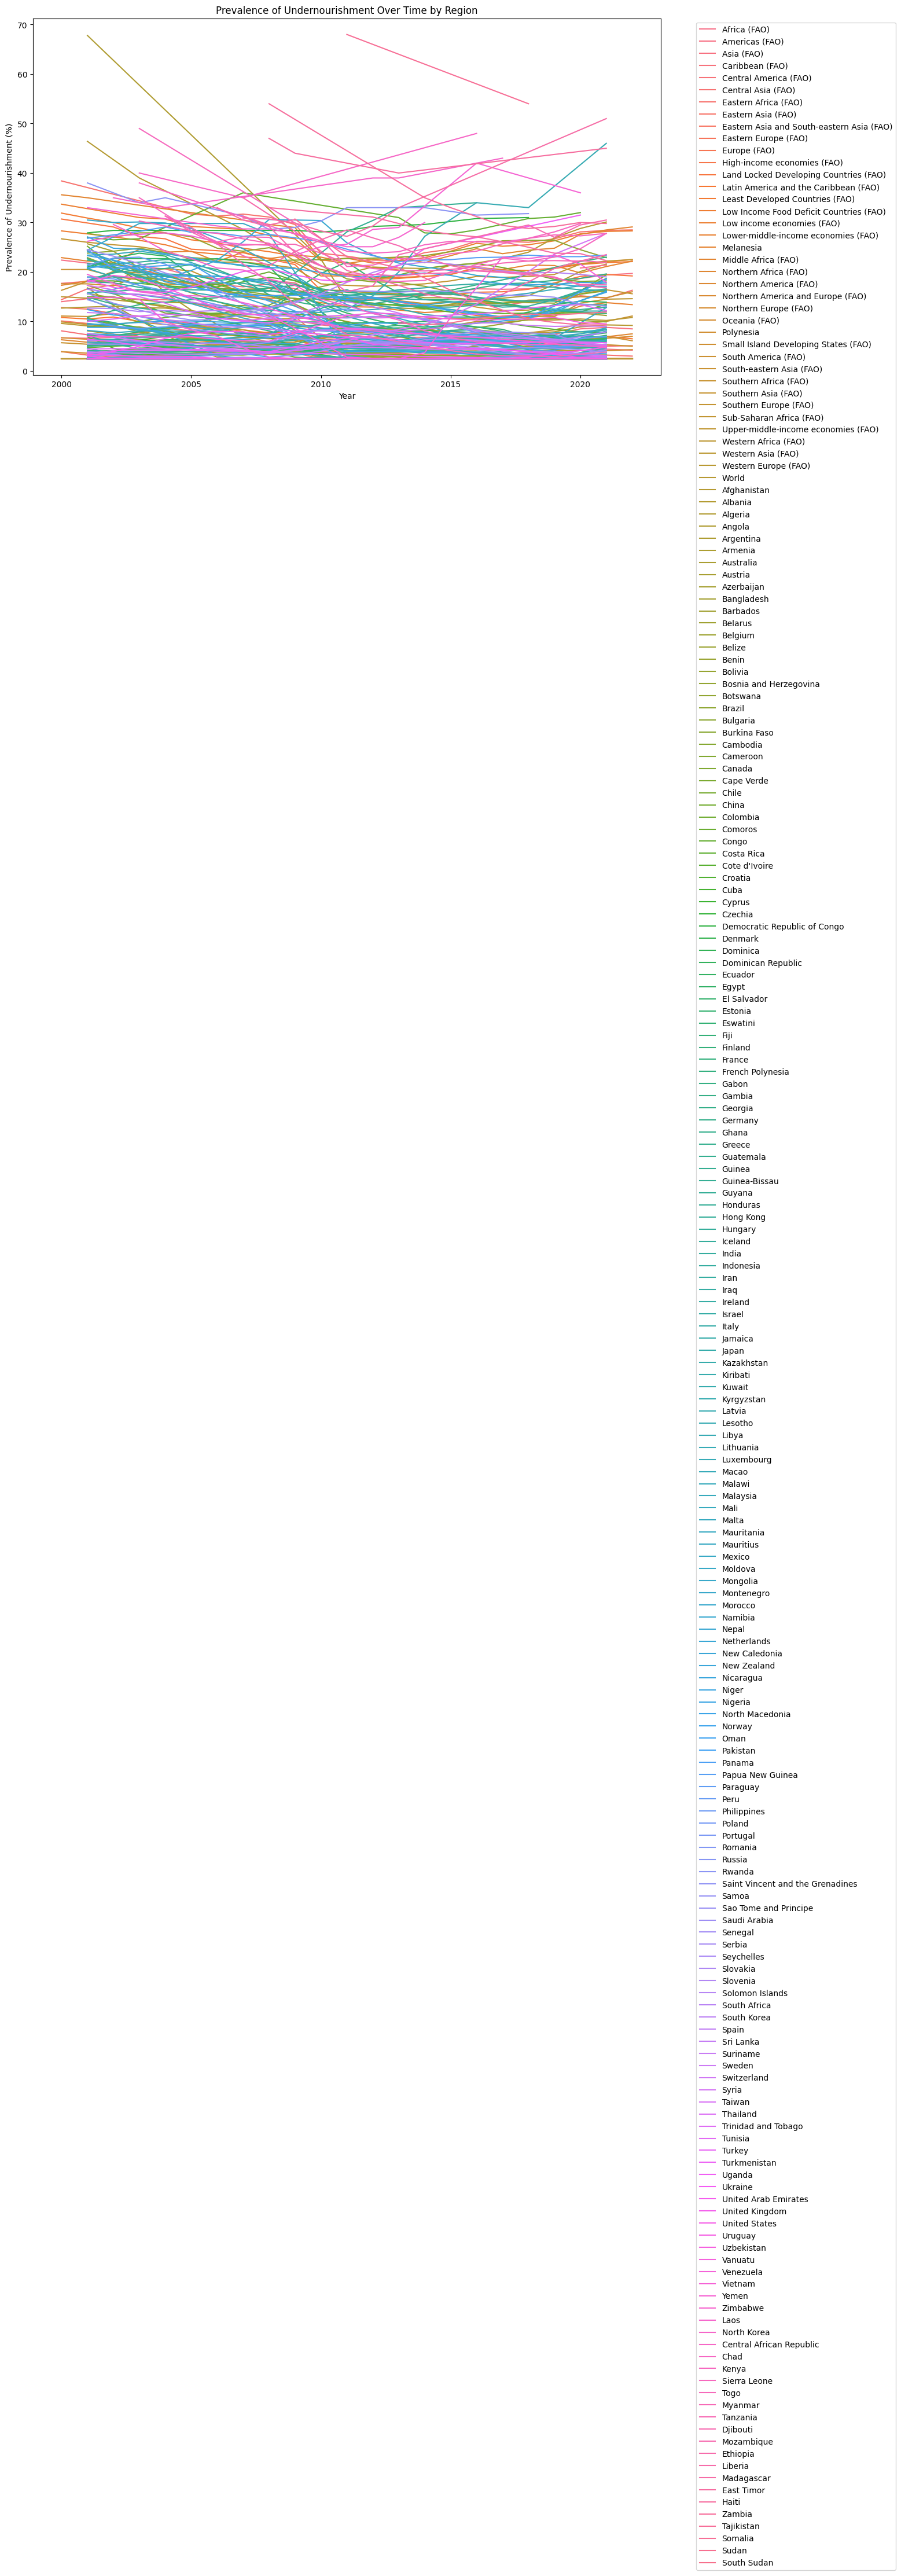

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Year', y='2.1.1 Prevalence of undernourishment', hue='Entity')
plt.title('Prevalence of Undernourishment Over Time by Region')
plt.ylabel('Prevalence of Undernourishment (%)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## Regions with Highest and Lowest Prevalence of Undernourishment



In [28]:

highest_prevalence = data.sort_values(by='2.1.1 Prevalence of undernourishment', ascending=False).head(10)
lowest_prevalence = data.sort_values(by='2.1.1 Prevalence of undernourishment').head(10)

print("Regions with the Highest Prevalence of Undernourishment:")
print(highest_prevalence[['Entity', 'Year', '2.1.1 Prevalence of undernourishment']])

print("\nRegions with the Lowest Prevalence of Undernourishment:")
print(lowest_prevalence[['Entity', 'Year', '2.1.1 Prevalence of undernourishment']])


Regions with the Highest Prevalence of Undernourishment:
                        Entity  Year  2.1.1 Prevalence of undernourishment
2284                   Somalia  2011                                  68.0
43                      Angola  2001                                  67.8
3745                   Somalia  2018                                  54.0
1700                    Zambia  2008                                  54.0
4316                Madagascar  2021                                  51.0
615               Sierra Leone  2003                                  49.0
3190  Central African Republic  2016                                  48.0
1569                     Haiti  2008                                  47.0
38                 Afghanistan  2001                                  46.4
4307                   Lesotho  2021                                  46.0

Regions with the Lowest Prevalence of Undernourishment:
                           Entity  Year  2.1.1 Prevalence of 


## Correlation Analysis



In [29]:

correlation = data[['Year', '2.1.1 Prevalence of undernourishment']].corr()
correlation


,Year,2.1.1 Prevalence of undernourishment
Year,1.00000,-0.11052
2.1.1 Prevalence of undernourishment,-0.11052,1.00000



## Time Series Forecasting



C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Debjit Mandal\AppD

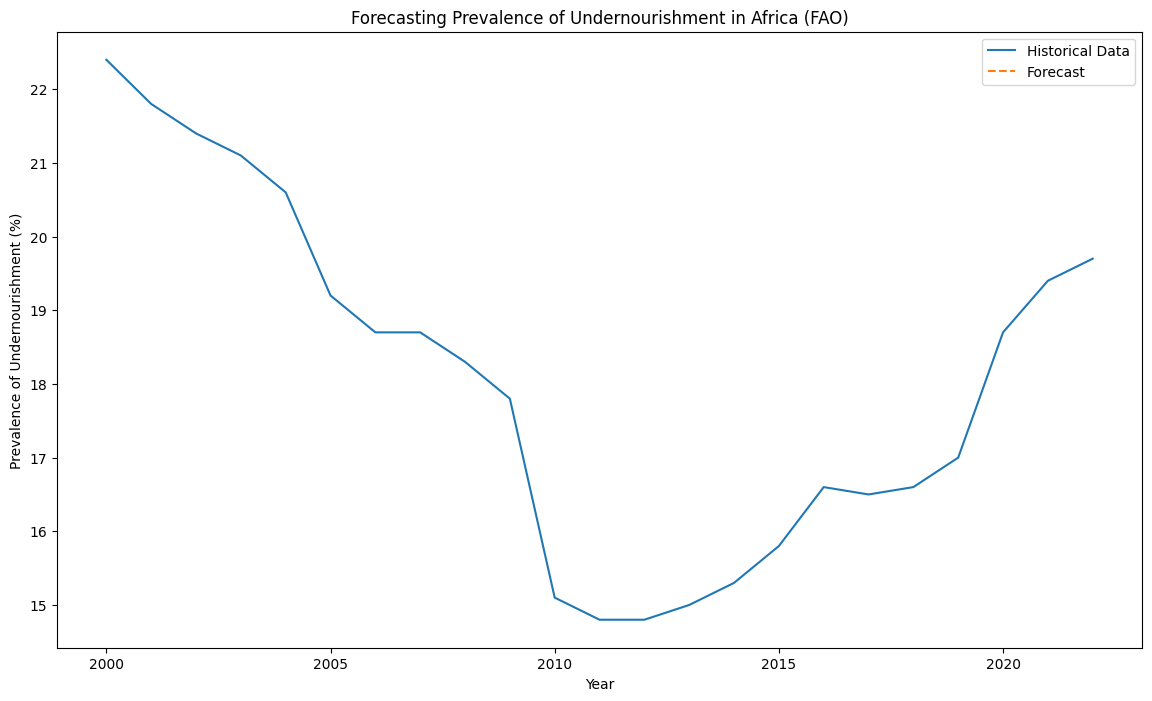

In [30]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

region_data = data[data['Entity'] == 'Africa (FAO)'].set_index('Year')
model = SARIMAX(region_data['2.1.1 Prevalence of undernourishment'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

forecast = result.get_forecast(steps=10)
forecast_index = list(range(region_data.index[-1] + 1, region_data.index[-1] + 11))
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

plt.figure(figsize=(14, 8))
plt.plot(region_data['2.1.1 Prevalence of undernourishment'], label='Historical Data')
plt.plot(forecast_series, label='Forecast', linestyle='--')
plt.title('Forecasting Prevalence of Undernourishment in Africa (FAO)')
plt.xlabel('Year')
plt.ylabel('Prevalence of Undernourishment (%)')
plt.legend()
plt.show()



## Clustering Analysis



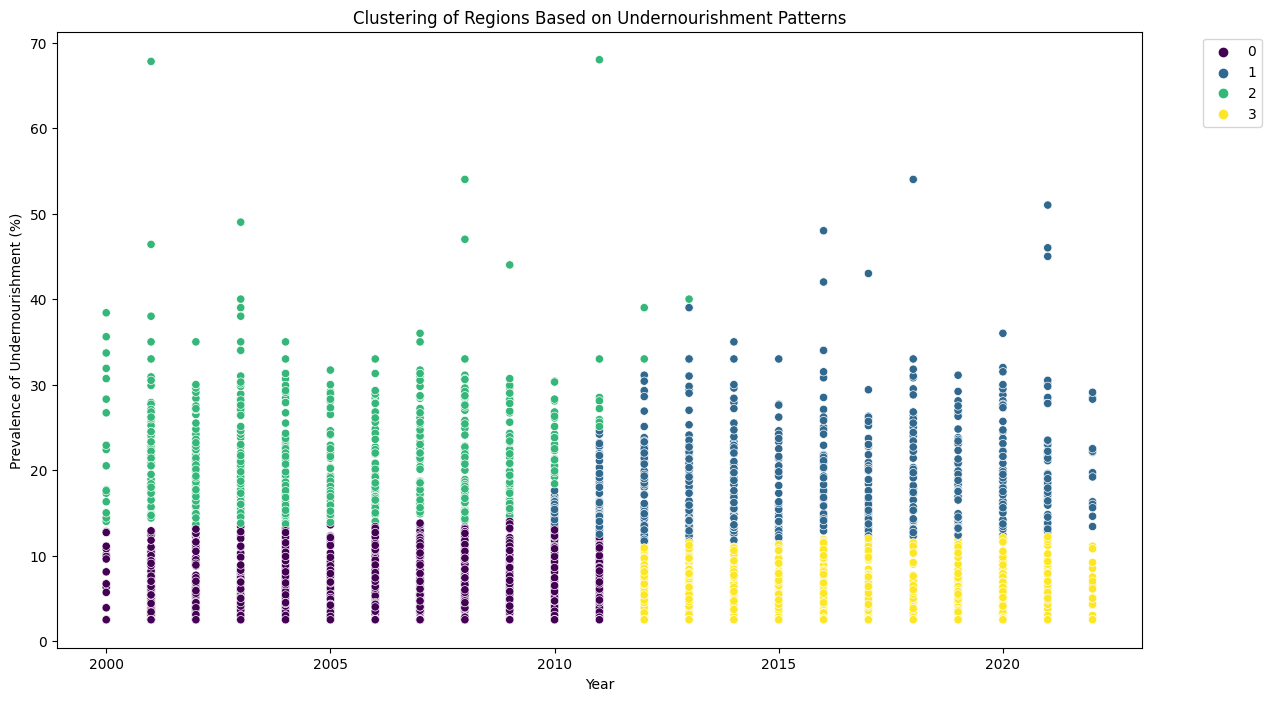

In [33]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Year', '2.1.1 Prevalence of undernourishment']])

kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Year', y='2.1.1 Prevalence of undernourishment', hue='Cluster', palette='viridis')
plt.title('Clustering of Regions Based on Undernourishment Patterns')
plt.xlabel('Year')
plt.ylabel('Prevalence of Undernourishment (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## Principal Component Analysis (PCA)



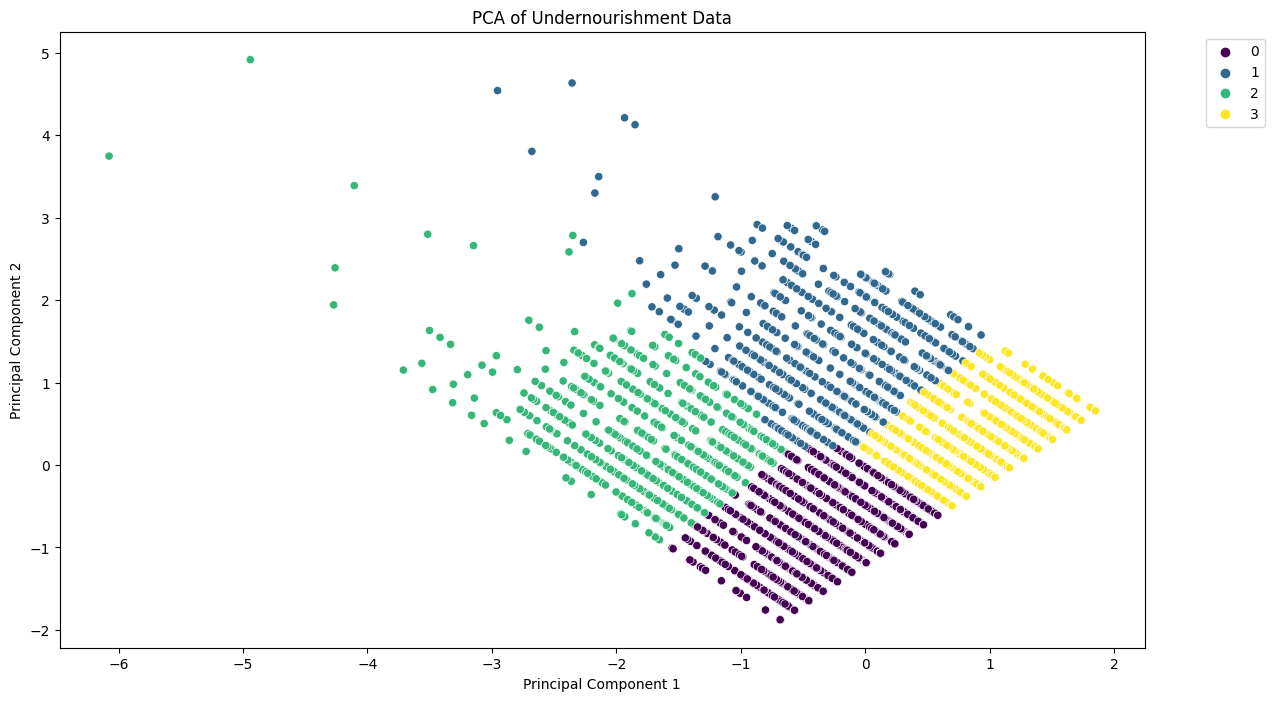

In [32]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('PCA of Undernourishment Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## Insights

1. **Trends Over Time**: The prevalence of undernourishment has shown different trends across various regions over time. Some regions have made significant progress, while others still face high levels of undernourishment.
2. **Regions with Highest Undernourishment**: Regions such as Sub-Saharan Africa have the highest prevalence of undernourishment, indicating severe food insecurity issues.
3. **Correlation with Year**: The correlation analysis reveals a trend where certain regions show a decrease in undernourishment over the years, reflecting efforts to improve food security.
4. **Clustering Analysis**: The clustering analysis identified distinct groups of regions with similar patterns of undernourishment, which can help in targeted interventions.
5. **Principal Component Analysis**: PCA helped in reducing the dimensionality of the data, making it easier to visualize and identify key patterns and clusters.

## Conclusion

The analysis of the prevalence of undernourishment across different regions and years provides valuable insights into global food security. Despite significant progress in some areas, undernourishment remains a critical issue in many parts of the world. Targeted efforts and interventions are necessary to address the underlying causes and achieve the global goal of ending hunger by 2030. Continued monitoring and analysis are essential to track progress and make informed decisions to combat undernourishment effectively.
